In [27]:
import numpy as np
import pandas as pd

In [28]:
df=pd.read_csv('USA_Housing.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


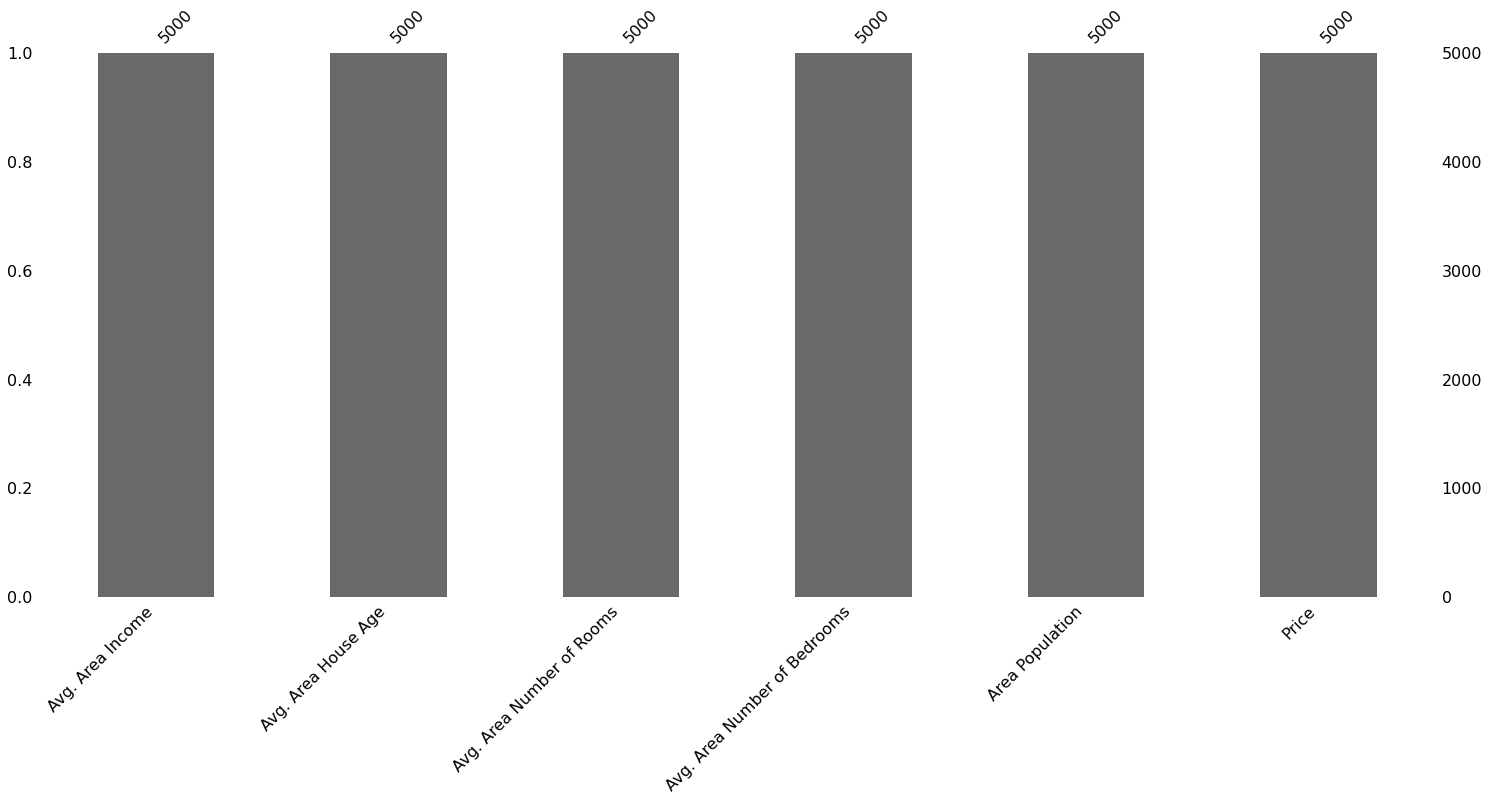

In [30]:
import missingno as mn
mn.bar(df)

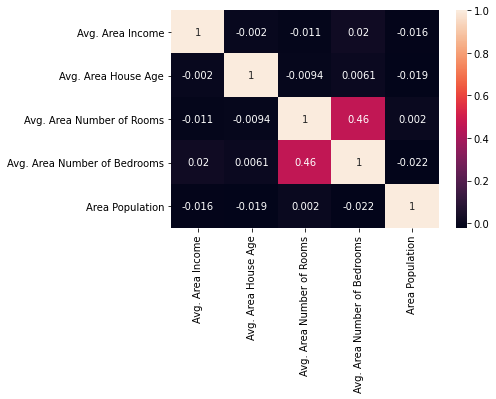

In [31]:
import seaborn as sns
sns.heatmap(df.iloc[:,:5].corr(),annot=True)

In [32]:
X=df.iloc[:,:5]
Y=df.iloc[:,5]
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
print(X_scaled)

[[ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [-0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [-0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [-0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


In [33]:
X_new=np.insert(X_scaled,0,1,axis=1)
print(X_new)

[[ 1.          1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.          1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [ 1.         -0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [ 1.         -0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [ 1.         -0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [ 1.         -0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


In [38]:
X_divided=[X_new[0:1000],X_new[1000:2000],X_new[2000:3000],X_new[3000:4000],X_new[4000:5000]]
Y_divided=[Y[0:1000],Y[1000:2000],Y[2000:3000],Y[3000:4000],Y[4000:5000]]

In [39]:
Beta_Values=[]
R2_Values=[]
max_R2=0
max_index=0
for i in range(0,5):
    frameX=[]
    frameY=[]
    for j in range(0,5):
        if j != i:
            frameX.append(X_divided[j])
            frameY.append(Y_divided[j])
    X_train=np.vstack(frameX)
    Y_train=np.hstack(frameY)
    X_test=X_divided[i]
    Y_test=Y_divided[i]
    A=X_train.T.dot(X_train)
    B=np.linalg.inv(A)
    C=B.dot(X_train.T)
    beta=C.dot(Y_train)
    Beta_Values.append(beta)
    Y_predict=X_test.dot(beta)
    error=Y_predict-Y_test
    sse=np.sum(error**2)
    y_mean=np.mean(Y_test)
    total_variance=np.sum((Y_test-y_mean)**2)
    r2=1-sse/total_variance
    R2_Values.append(r2)
    if(r2>max_R2):
        max_R2=r2
        max_index=i
print(Beta_Values)
print(R2_Values)
print(max_index)

[array([1231872.07704612,  229923.70318635,  164052.98579011,
        120923.57426579,    3533.77470973,  151855.58542488]), array([1232586.40453402,  228365.32287054,  165201.14881927,
        122539.46855211,    1697.03433458,  150055.81710562]), array([1231448.09063371,  230730.20810582,  163554.55706976,
        121669.08713233,    2620.25215054,  150923.12489298]), array([1.23144707e+06, 2.29921558e+05, 1.64523054e+05, 1.19737507e+05,
       1.12425659e+03, 1.51317802e+05]), array([1233028.38536436,  230778.59921985,  163755.13607252,
        121885.1351222 ,    1247.01304382,  150084.29759618])]
[0.9175899480765107, 0.920301549640113, 0.9152429915320014, 0.9208503836977656, 0.9138111758717495]
3


In [40]:
bestBeta=Beta_Values[max_index]

In [42]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_new,Y,test_size=0.30,random_state=42)

In [44]:
Y_predict=X_test1.dot(bestBeta)
error=Y_predict-Y_test1
sse=np.sum(error**2)
y_mean=np.mean(Y_test1)
total_variance=np.sum((Y_test1-y_mean)**2)
r2_final=1-sse/total_variance
print(r2_final)

0.9146868482147402
